In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
hp = pd.read_csv('sp500_stocks_4.18.2024.csv', parse_dates=True, index_col='Date')
hp = hp[(hp.index >= pd.Timestamp('2024-01-01')) & (hp.index <= pd.Timestamp('2024-12-31'))]


In [3]:
hp.head()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-01-02,MMM,90.176018,91.973244,92.525085,90.677261,90.819397,3321053.0
2024-01-03,MMM,88.364296,90.125420,91.521736,89.297661,91.329430,3547575.0
2024-01-04,MMM,88.675812,90.443146,91.421402,90.058525,90.367889,3319976.0
2024-01-05,MMM,89.020119,90.794312,91.546822,89.924751,90.284279,1991579.0
2024-01-08,MMM,89.241463,91.020065,91.103676,89.958191,90.518394,2535042.0


In [4]:
mshp = hp[hp['Symbol'] == 'MSFT']

In [5]:
num_rows = mshp.shape[0]
print("Number of rows:", num_rows)

Number of rows: 74


In [6]:
mshp.tail()

,Symbol,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,,
2024-04-11,MSFT,427.929993,427.929993,429.369995,422.359985,425.820007,17966400.0
2024-04-12,MSFT,421.899994,421.899994,425.179993,419.769989,424.049988,19232100.0
2024-04-15,MSFT,413.640015,413.640015,426.820007,413.429993,426.600006,20273500.0
2024-04-16,MSFT,414.579987,414.579987,418.399994,413.730011,414.570007,16765600.0
2024-04-17,MSFT,411.839996,411.839996,418.880005,410.329987,417.595001,15779844.0


C:\Users\ericz\AppData\Local\Temp\ipykernel_16604\3865135180.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])


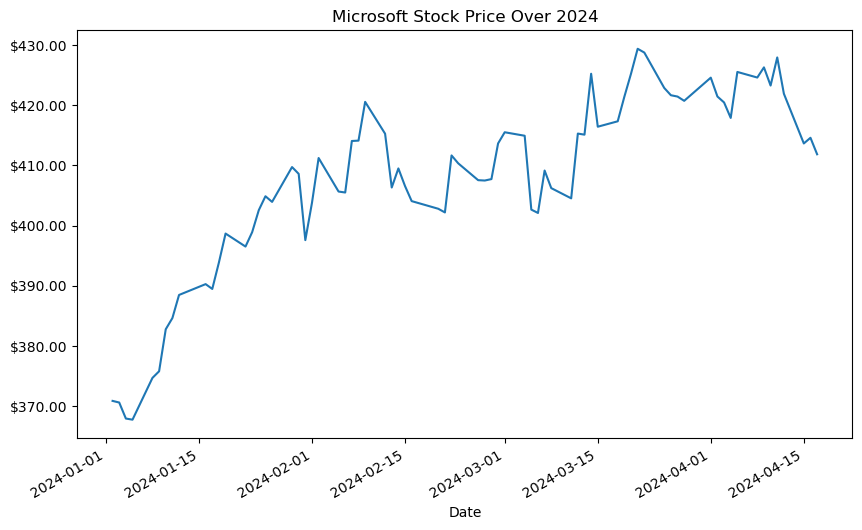

In [7]:
import matplotlib.pyplot as plt

mshp['Close'].plot(title='Microsoft Stock Price Over 2024', figsize=(10, 6))
plt.gca().set_yticklabels(['${:,.2f}'.format(x) for x in plt.gca().get_yticks()])
plt.show()

In [8]:
result = adfuller(mshp['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.506460
p-value: 0.113910


In [9]:
mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)
mshp_diff = mshp.dropna()

C:\Users\ericz\AppData\Local\Temp\ipykernel_16604\3269642563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mshp['Differenced_Close'] = mshp['Close'] - mshp['Close'].shift(1)


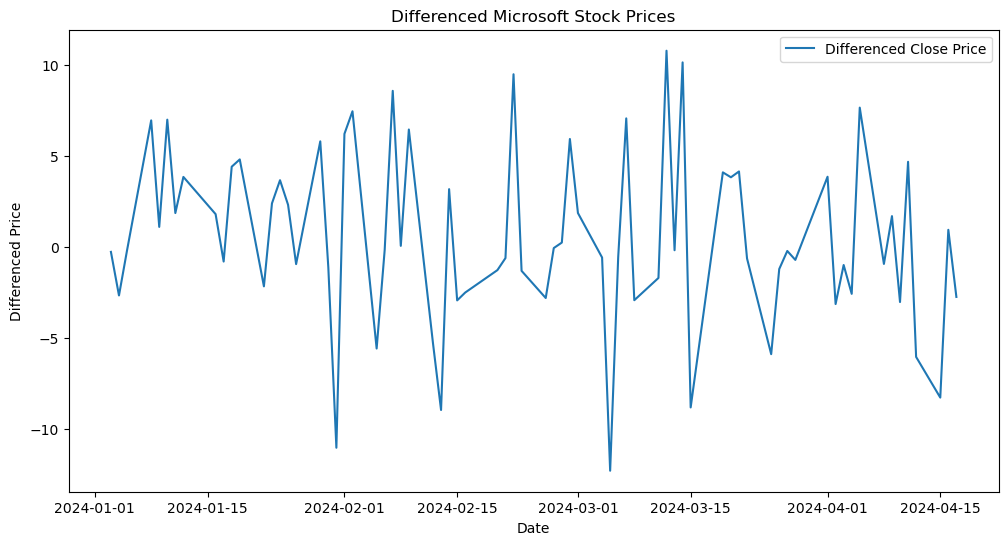

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(mshp_diff['Differenced_Close'], label='Differenced Close Price')
plt.title('Differenced Microsoft Stock Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()

In [11]:
result = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -7.348833
p-value: 0.000000


In [12]:
result_diff = adfuller(mshp_diff['Differenced_Close'])
print('ADF Statistic after differencing: %f' % result_diff[0])
print('p-value after differencing: %f' % result_diff[1])
for key, value in result_diff[4].items():
    print('Critical Value (%s): %f' % (key, value))

ADF Statistic after differencing: -7.348833
p-value after differencing: 0.000000
Critical Value (1%): -3.526005
Critical Value (5%): -2.903200
Critical Value (10%): -2.588995


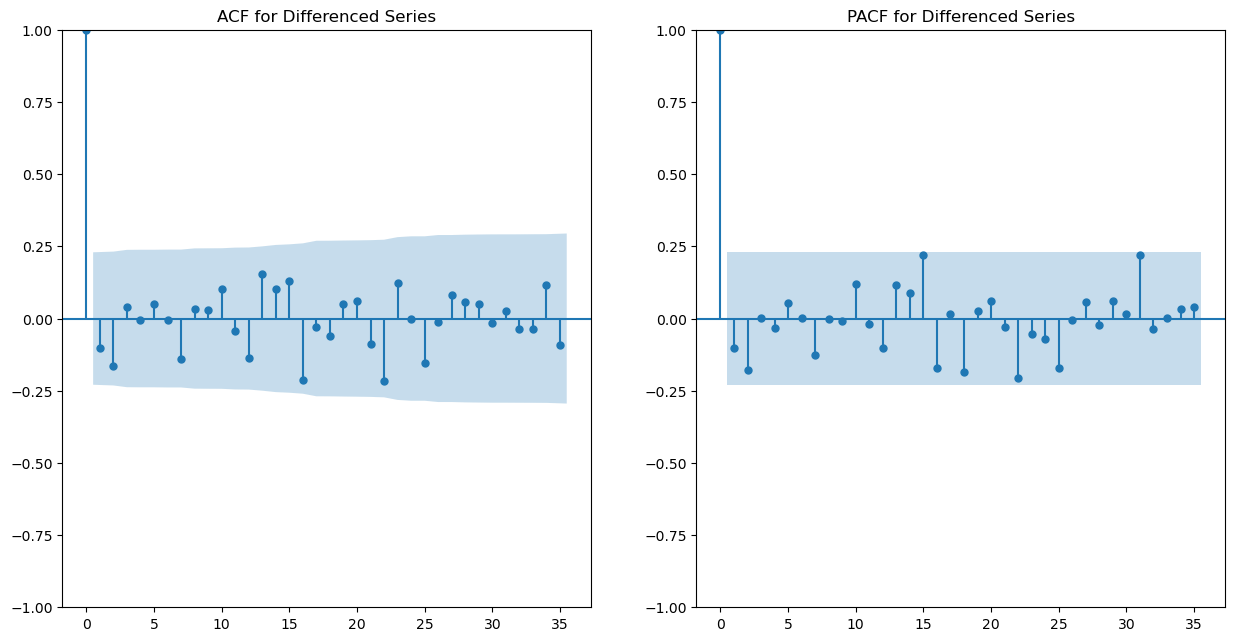

In [13]:
plt.figure(figsize=(15, 7.5))
plt.subplot(121)
plot_acf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('ACF for Differenced Series')

plt.subplot(122)
plot_pacf(mshp_diff['Differenced_Close'], ax=plt.gca(), lags=35)
plt.title('PACF for Differenced Series')
plt.show()

In [14]:
model = ARIMA(mshp['Close'], order=(30, 1, 1))
fitted_model = model.fit()

print(fitted_model.summary())

C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive pa

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                   74
Model:                ARIMA(30, 1, 1)   Log Likelihood                -200.242
Date:                Sun, 21 Apr 2024   AIC                            464.484
Time:                        00:18:19   BIC                            537.779
Sample:                             0   HQIC                           493.694
                                 - 74                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5505      0.307      1.792      0.073      -0.052       1.153
ar.L2         -0.1264      0.227     -0.556      0.578      -0.572       0.319
ar.L3          0.1477      0.373      0.396      0.6

In [15]:
forecast = fitted_model.forecast(steps=14)
print(forecast)

74    412.142934
75    414.624530
76    411.710524
77    410.631080
78    413.822433
79    415.241149
80    421.757975
81    417.016272
82    418.873429
83    415.954350
84    416.521858
85    417.208139
86    416.479562
87    415.251844
Name: predicted_mean, dtype: float64


C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\ericz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [16]:
for i, price in enumerate(forecast, 1):
    print(f"Day {i}: ${price:.2f}")

Day 1: $412.14
Day 2: $414.62
Day 3: $411.71
Day 4: $410.63
Day 5: $413.82
Day 6: $415.24
Day 7: $421.76
Day 8: $417.02
Day 9: $418.87
Day 10: $415.95
Day 11: $416.52
Day 12: $417.21
Day 13: $416.48
Day 14: $415.25


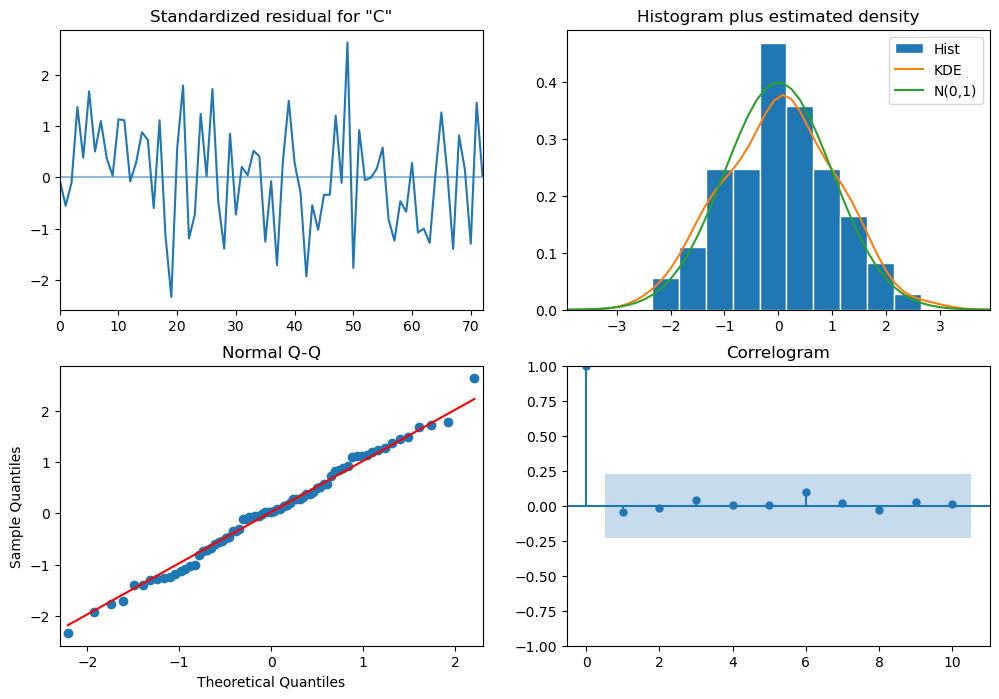

In [17]:
fitted_model.plot_diagnostics(figsize=(12, 8))
plt.show()

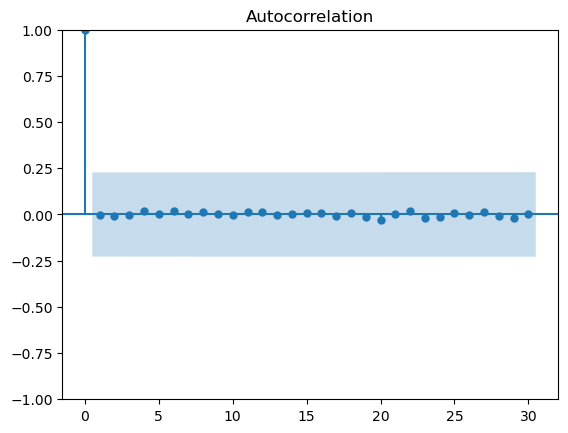

In [18]:
plot_acf(fitted_model.resid, lags=30)
plt.show()
